In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, log_loss
from sklearn.cross_validation import train_test_split
from sklearn import cluster
from sklearn.decomposition import PCA
from scipy.stats import itemfreq
from mpl_toolkits.mplot3d import Axes3D


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
%matplotlib inline

In [2]:
%%time
df_raw = pd.read_csv('techsoup_datakind_details_wide.csv')

CPU times: user 7.93 s, sys: 938 ms, total: 8.87 s
Wall time: 11.1 s


/Users/David/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
df_raw.head(3)

,pri_key,org,city,state,postalcode,country,org_type,org_subtype,budget,reg_date,contact,role,role_description,order_num,tax_id_number,landing_page,Medium,transaction_date,vendor,item,category,licenses,revenue,value
0,1,105872,Villa Rica,GA,30180,US,15,408,100000,2002-09-05 10:38:23.483,35300,17,Program Officer,475417,63-1242259,NaN,NaN,2010-06-21,3882,45200711,NaN,1,31,765
1,2,105872,Villa Rica,GA,30180,US,15,408,100000,2002-09-05 10:38:23.483,35300,17,Program Officer,475417,63-1242259,NaN,NaN,2010-06-21,3882,39959521,NaN,10,80,1990
2,3,105872,Villa Rica,GA,30180,US,15,408,100000,2002-09-05 10:38:23.483,35300,17,Program Officer,260764,63-1242259,NaN,NaN,2008-02-06,3892,23664563,NaN,1,5,40


In [4]:
df = df_raw[['org', 'item', 'transaction_date']]

In [5]:
df14 = df[df.transaction_date > '2014-01-01 00:00:00.000']

In [6]:
df14 = df14.set_index('org').drop('transaction_date', axis = 1)

In [7]:
%%time
dd14 = pd.get_dummies(df14.item)

CPU times: user 1.6 s, sys: 2.32 s, total: 3.92 s
Wall time: 4.74 s


In [8]:
dd14.head()

,11950880,11950902,11950912,11951016,11951055,11951057,11951146,11951230,11951248,11951298,11951329,11951331,11951333,11951336,11951338,11951342,11951357,11951359,11951367,11951371,11951373,11951381,11951394,11951396,11951404,...,100662005,101130870,101130879,101130888,101383540,101383555,101383564,101384601,101384610,101384628,101384637,101664400,101769558,101769573,101769588,101769603,101769618,102373968,102440866,102440875,102440884,102440893,102944954,102945055,102945098
org,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
945475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
527831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
849184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
849184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
849184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
%%time
dd14 = dd14.groupby(dd14.index).sum()

CPU times: user 13.4 s, sys: 20.7 s, total: 34.1 s
Wall time: 45.3 s


In [12]:
X = dd14.values

In [15]:
X.shape

(141419, 1614)

### sub sample

In [54]:
Xt = X[:10000]

In [55]:
%%time
pca = PCA(n_components = 100)
pca.fit(Xt)

CPU times: user 22.2 s, sys: 675 ms, total: 22.9 s
Wall time: 9.3 s


In [65]:
%%time
X_pca = pca.transform(Xt)

CPU times: user 457 ms, sys: 78 ms, total: 535 ms
Wall time: 299 ms


In [66]:
%%time
clf = cluster.KMeans(init='k-means++', n_clusters=4, random_state=2)
clf.fit(X_pca)
print clf.labels_.shape
labels = clf.labels_

(10000,)
CPU times: user 1.13 s, sys: 35.7 ms, total: 1.17 s
Wall time: 850 ms


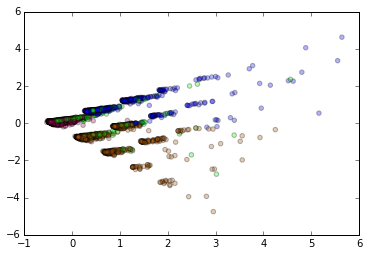

In [67]:
x = X_pca[:,0]
y = X_pca[:,1]

plt.scatter(x,y, c=labels, cmap=plt.cm.brg, alpha = .3)

In [68]:
x = X_pca[:,0]
y = X_pca[:,1]
z = X_pca[:,2]

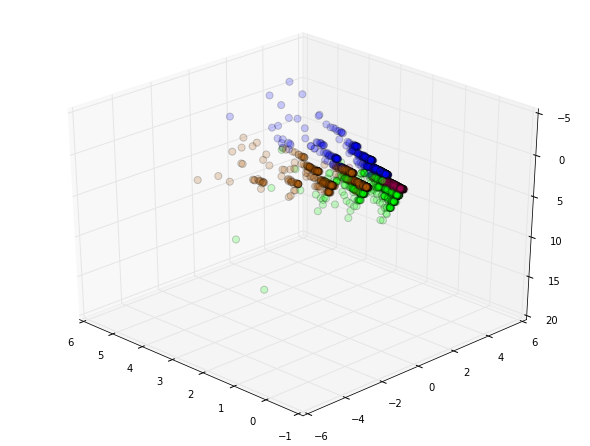

In [69]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=45)
ax.scatter(x, y, z, c= labels,
           cmap=plt.cm.brg, alpha = .2, s = 50)

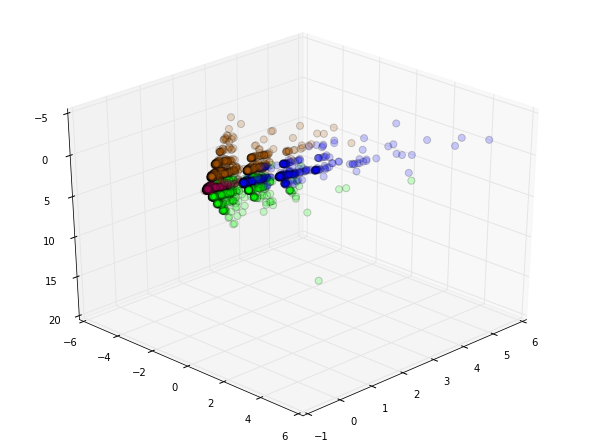

In [63]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=-45)
ax.scatter(x, y, z, c= labels,
           cmap=plt.cm.brg, alpha = .2, s = 50)

In [50]:
itemfreq(labels)

array([[   0, 1155],
       [   1, 5287],
       [   2, 1798],
       [   3, 1760]])

### full sample

In [ ]:
%%time
pca = PCA(n_components = 10)
pca.fit(Xt)